In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB



In [2]:
df_por = pd.read_pickle('./brazilstudents.pkl')
df_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,student_performance
0,GP,F,18,U,GT3,A,4,4,course,mother,...,no,4,3,4,1,1,3,4,11,1
1,GP,F,17,U,GT3,T,1,1,course,father,...,no,5,3,3,1,1,3,2,11,1
2,GP,F,15,U,LE3,T,1,1,other,mother,...,no,4,3,2,2,3,3,6,12,1
3,GP,F,15,U,GT3,T,4,2,home,mother,...,yes,3,2,2,1,1,5,0,14,1
4,GP,F,16,U,GT3,T,3,3,home,father,...,no,4,3,2,1,2,5,0,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,course,mother,...,no,5,4,2,1,2,5,4,10,1
645,MS,F,18,U,LE3,T,3,1,course,mother,...,no,4,3,4,1,1,1,4,16,2
646,MS,F,18,U,GT3,T,1,1,course,mother,...,no,1,1,1,1,1,5,6,9,0
647,MS,M,17,U,LE3,T,3,1,course,mother,...,no,2,4,5,3,4,2,6,10,1


In [4]:
df_por.drop(columns = ['G3'], inplace = True)

In [6]:
df_por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'student_performance'],
      dtype='object')

In [7]:
num_cats = ['age', 'absences', 'failures' ] #Removed G3 for pipeline prediction reasons
nominal_cats = ['school', 'sex', 'address', 'Pstatus', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', ]
ordinal_cats = ['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'Medu', 'Fedu', 'studytime', 'traveltime']

In [8]:
numeric_pipeline = Pipeline([('numimputer', SimpleImputer(strategy= 'mean')), ('numnorm', StandardScaler())])

ordinal_pipeline = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')), 
    ('ordnorm', StandardScaler())
    ])

nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first')),
    ('onehotnorm', MaxAbsScaler())
])

In [9]:
ct = ColumnTransformer(
    [("ordinal_pipe", ordinal_pipeline, ordinal_cats),
    ("nominal_pipe", nominal_pipeline, nominal_cats),
    ("numeric_pipe", numeric_pipeline, num_cats)]
)

In [10]:
ct

ColumnTransformer(transformers=[('ordinal_pipe',
                                 Pipeline(steps=[('ordimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordnorm',
                                                  StandardScaler())]),
                                 ['famrel', 'freetime', 'goout', 'Dalc', 'Walc',
                                  'health', 'Medu', 'Fedu', 'studytime',
                                  'traveltime']),
                                ('nominal_pipe',
                                 Pipeline(steps=[('onehotimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotenc',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False)),
                              

In [11]:
k_pipe = Pipeline([
    ('preprocessing', ct),
    ('model', KNeighborsClassifier())
])


In [13]:
X = df_por.drop(columns = ['student_performance'])
y = df_por['student_performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 305, stratify = y)

In [14]:
k_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ordinal_pipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordnorm',
                                                                   StandardScaler())]),
                                                  ['famrel', 'freetime',
                                                   'goout', 'Dalc', 'Walc',
                                                   'health', 'Medu', 'Fedu',
                                                   'studytime', 'traveltime']),
                                                 ('nominal_pipe',
                                                  Pipeline(steps=[('onehotimputer',
                                                                   SimpleImputer(strateg

In [15]:
y_pred = k_pipe.predict(X_test)

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


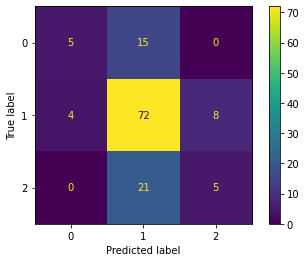

In [16]:
plot_confusion_matrix(k_pipe, X_test, y_test)

In [17]:
accuracy_score(y_test, y_pred)

0.6307692307692307

In [18]:
k_pipe_grid = {'preprocessing__numeric_pipe__numimputer__strategy': ['mean', 'median'], 
                'model__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25],
                'model__p': [1, 2, 3, 4]
                }

In [19]:
gridsearch = GridSearchCV(estimator = k_pipe, param_grid= k_pipe_grid, scoring= 'roc_auc')

In [20]:
gridsearch.fit(X_train, y_train)

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validatio

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('ordinal_pipe',
                                                                         Pipeline(steps=[('ordimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordnorm',
                                                                                          StandardScaler())]),
                                                                         ['famrel',
                                                                          'freetime',
                                                                          'goout',
                                                                          'Dalc',
                                                                       

In [21]:
best_model = gridsearch.best_estimator_

In [22]:
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ordinal_pipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordnorm',
                                                                   StandardScaler())]),
                                                  ['famrel', 'freetime',
                                                   'goout', 'Dalc', 'Walc',
                                                   'health', 'Medu', 'Fedu',
                                                   'studytime', 'traveltime']),
                                                 ('nominal_pipe',
                                                  Pipeline(steps=[('onehotimputer',
                                                                   SimpleImputer(strateg

In [23]:
y_pred_k = best_model.predict(X_test)

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


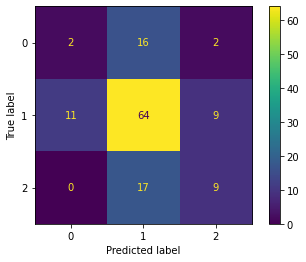

In [24]:
plot_confusion_matrix(best_model,
                      X_test,
                      y_test)

In [25]:
naive_bayes_pipe = Pipeline([
    ('preprocessing', ct),
    ('model', GaussianNB())
])


In [26]:
naive_bayes_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ordinal_pipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordnorm',
                                                                   StandardScaler())]),
                                                  ['famrel', 'freetime',
                                                   'goout', 'Dalc', 'Walc',
                                                   'health', 'Medu', 'Fedu',
                                                   'studytime', 'traveltime']),
                                                 ('nominal_pipe',
                                                  Pipeline(steps=[('onehotimputer',
                                                                   SimpleImputer(strateg

In [27]:
y_pred_NB = naive_bayes_pipe.predict(X_test)

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


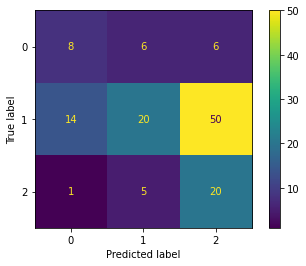

In [28]:
plot_confusion_matrix(naive_bayes_pipe, X_test, y_test)